In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Create some data

entries = np.loadtxt('galaxy_feature_vectors.csv', delimiter = ',' ,)
nb_features = len(entries[1]) - 1
random.shuffle(entries,random.random)

x = entries[:,:-1]
y = entries[:,nb_features]

# min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x)

x_normalized = scaler.transform(x)

x_trainval, x_test, y_trainval, y_test = train_test_split(x_normalized, y, stratify=y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, stratify=y_trainval, test_size=0.1)  

In [3]:
print(nb_features)

75


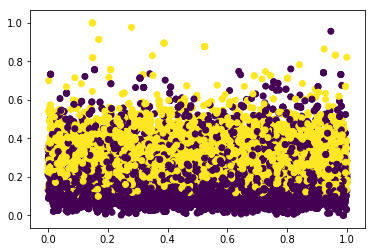

In [4]:
#Plot the training data

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

## Code pour entraîner un réseau de neurones avec Keras

In [5]:
#1. Définir le modèle

from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [6]:
import keras
from keras.layers import Dense
rate = 0.5

x_train_normalized = scaler.transform(x_train)
x_val_normalized = scaler.transform(x_val)

model.add(keras.layers.core.Dense(100, activation='relu', input_dim=nb_features))

model.add(keras.layers.core.Dense(100, activation='relu'))
model.add(keras.layers.core.Dropout(rate=rate))

model.add(Dense(units=2, activation='softmax'))

In [7]:
#2. Compiler
from keras import optimizers

sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

# Note: on utilise "sparse_categorical_crossentropy" si "y" est un vecteur de
#  nombres entiers (int), et le modèle utilise "softmax" pour la prédiction.

# Note #2: SGD = Stochastic Gradient Descent (descente de gradient stochastique)

In [8]:
#3. Entraîner 

# On va utiliser Tensorboard pour visualizer le progrès de l'entraînement
tb_callback = keras.callbacks.TensorBoard(log_dir='./logs/e-1000')


history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=250, batch_size=100, callbacks=[tb_callback], verbose=2)

Train on 13695 samples, validate on 1522 samples
Epoch 1/250
 - 0s - loss: 0.6412 - acc: 0.6580 - val_loss: 0.5574 - val_acc: 0.8108
Epoch 2/250
 - 0s - loss: 0.4895 - acc: 0.8075 - val_loss: 0.3895 - val_acc: 0.8587
Epoch 3/250
 - 0s - loss: 0.3776 - acc: 0.8561 - val_loss: 0.3074 - val_acc: 0.8857
Epoch 4/250
 - 0s - loss: 0.3108 - acc: 0.8862 - val_loss: 0.2515 - val_acc: 0.9133
Epoch 5/250
 - 0s - loss: 0.2689 - acc: 0.9037 - val_loss: 0.2101 - val_acc: 0.9264
Epoch 6/250
 - 0s - loss: 0.2352 - acc: 0.9168 - val_loss: 0.1997 - val_acc: 0.9212
Epoch 7/250
 - 0s - loss: 0.2143 - acc: 0.9249 - val_loss: 0.1807 - val_acc: 0.9264
Epoch 8/250
 - 0s - loss: 0.1969 - acc: 0.9305 - val_loss: 0.1545 - val_acc: 0.9422
Epoch 9/250
 - 0s - loss: 0.1878 - acc: 0.9319 - val_loss: 0.1470 - val_acc: 0.9435
Epoch 10/250
 - 0s - loss: 0.1779 - acc: 0.9357 - val_loss: 0.1380 - val_acc: 0.9507
Epoch 11/250
 - 0s - loss: 0.1696 - acc: 0.9413 - val_loss: 0.1310 - val_acc: 0.9553
Epoch 12/250
 - 0s - loss

Epoch 97/250
 - 0s - loss: 0.0858 - acc: 0.9709 - val_loss: 0.0710 - val_acc: 0.9731
Epoch 98/250
 - 0s - loss: 0.0855 - acc: 0.9712 - val_loss: 0.0691 - val_acc: 0.9750
Epoch 99/250
 - 0s - loss: 0.0846 - acc: 0.9711 - val_loss: 0.0735 - val_acc: 0.9731
Epoch 100/250
 - 0s - loss: 0.0841 - acc: 0.9718 - val_loss: 0.0697 - val_acc: 0.9750
Epoch 101/250
 - 0s - loss: 0.0849 - acc: 0.9709 - val_loss: 0.0908 - val_acc: 0.9619
Epoch 102/250
 - 0s - loss: 0.0837 - acc: 0.9707 - val_loss: 0.0704 - val_acc: 0.9757
Epoch 103/250
 - 0s - loss: 0.0828 - acc: 0.9717 - val_loss: 0.0647 - val_acc: 0.9770
Epoch 104/250
 - 0s - loss: 0.0837 - acc: 0.9720 - val_loss: 0.0731 - val_acc: 0.9731
Epoch 105/250
 - 0s - loss: 0.0831 - acc: 0.9720 - val_loss: 0.0658 - val_acc: 0.9737
Epoch 106/250
 - 0s - loss: 0.0835 - acc: 0.9712 - val_loss: 0.0675 - val_acc: 0.9757
Epoch 107/250
 - 0s - loss: 0.0827 - acc: 0.9714 - val_loss: 0.0714 - val_acc: 0.9711
Epoch 108/250
 - 0s - loss: 0.0832 - acc: 0.9719 - val_lo

Epoch 193/250
 - 0s - loss: 0.0662 - acc: 0.9769 - val_loss: 0.0517 - val_acc: 0.9796
Epoch 194/250
 - 0s - loss: 0.0658 - acc: 0.9777 - val_loss: 0.0567 - val_acc: 0.9790
Epoch 195/250
 - 0s - loss: 0.0649 - acc: 0.9780 - val_loss: 0.0687 - val_acc: 0.9757
Epoch 196/250
 - 0s - loss: 0.0648 - acc: 0.9788 - val_loss: 0.0599 - val_acc: 0.9763
Epoch 197/250
 - 0s - loss: 0.0666 - acc: 0.9780 - val_loss: 0.0543 - val_acc: 0.9816
Epoch 198/250
 - 0s - loss: 0.0640 - acc: 0.9784 - val_loss: 0.0534 - val_acc: 0.9829
Epoch 199/250
 - 0s - loss: 0.0622 - acc: 0.9788 - val_loss: 0.0631 - val_acc: 0.9796
Epoch 200/250
 - 0s - loss: 0.0663 - acc: 0.9779 - val_loss: 0.0597 - val_acc: 0.9809
Epoch 201/250
 - 0s - loss: 0.0621 - acc: 0.9793 - val_loss: 0.0590 - val_acc: 0.9783
Epoch 202/250
 - 0s - loss: 0.0625 - acc: 0.9780 - val_loss: 0.0571 - val_acc: 0.9816
Epoch 203/250
 - 0s - loss: 0.0629 - acc: 0.9783 - val_loss: 0.0606 - val_acc: 0.9783
Epoch 204/250
 - 0s - loss: 0.0624 - acc: 0.9787 - val

In [14]:
#4. Evaluer la performance en test

model.evaluate(x_test, y_test)

1691/1691 [==============================] - 0s 22us/step


[0.0909955512125338, 0.9710230632761679]

In [10]:
# On peut aussi obtenir des prédictions (pour des nouvelles examples)

# Probabilités par classe:
y_probs = model.predict(x_test)

In [11]:
# Décision du modèle

y_pred = y_probs.argmax(axis=1)

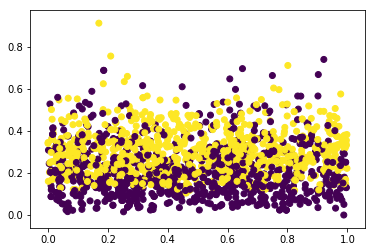

In [12]:
# Predicted classes:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)

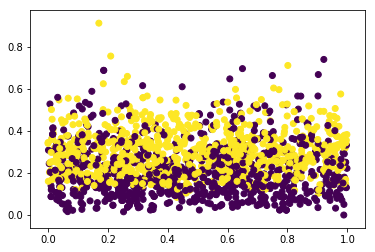

In [13]:
# Actual classes:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

changement # perceptrons dans layers: tr=0.005, 10 epochs
changement # epochs: 100-100-2, tr=0.005
changement TR: epochs=60, 100-100-2
changement # layers: tr=0.005

(0, 999)

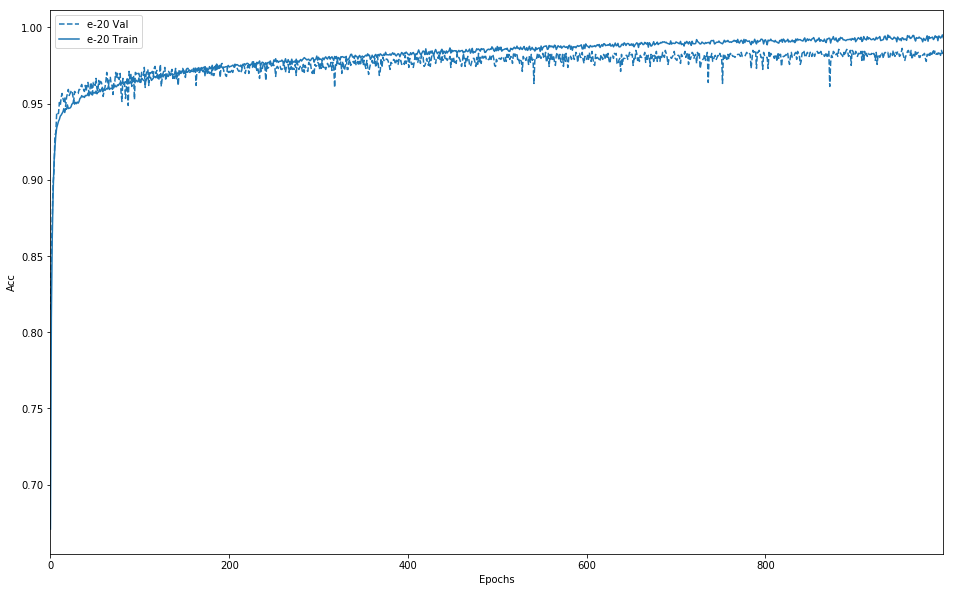

In [95]:
plt.figure(figsize=(16,10))
key='acc'
val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label='e-20 Val')
plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label='e-20 Train')

plt.xlabel('Epochs')
plt.ylabel(key.replace('_',' ').title())
plt.legend()

plt.xlim([0,max(history.epoch)])